In [1]:
# fmt: off
from Utilities.Utils import plot_images
from Utilities.Interpretability.InterpretabilityMethods import * 
from Utilities.SequentialLearning.Tasks.IntelNaturalScenesClassificationTask import IntelNaturalScenesClassificationTask as Task
from Utilities.SequentialLearning.AdversarialTraining import AdversarialExampleTrainer

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow as tf
# fmt: on
print(tf.config.list_physical_devices('GPU'))

[]


In [2]:
MODEL_SAVE_PATH = "models/INTERLEAVED_ADVERSARIAL_MODEL"
model:tf.keras.models.Model = tf.keras.models.load_model(MODEL_SAVE_PATH, compile=False) # type: ignore
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

task = Task(
    "Task1",
    model,
    loss_fn,
    task_labels=[0,1,2,3,4,5],
    training_batches=0,
    validation_batches=0,
    batch_size=32,
    data_path="../../datasets/IntelNaturalScenes"
)
task.compile_model(loss_fn)

model.summary()

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_0 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 144, 144, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 72, 72, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 72, 72,

In [3]:
EPSILON = 0.01
adversarial_example_trainer = AdversarialExampleTrainer(task)

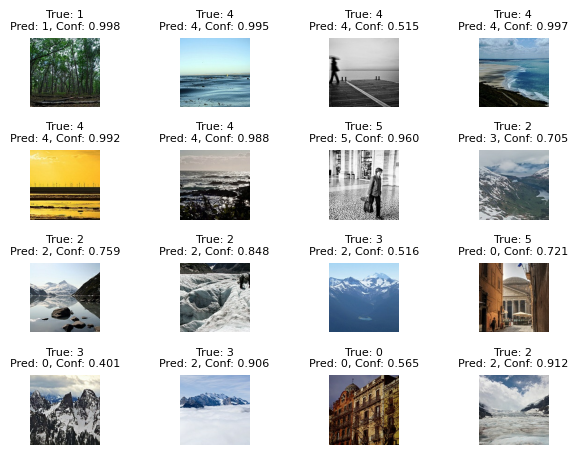

In [5]:
adversarial_example_trainer.plot_adversarial_images(0, 16, True, use_validation_dataset=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

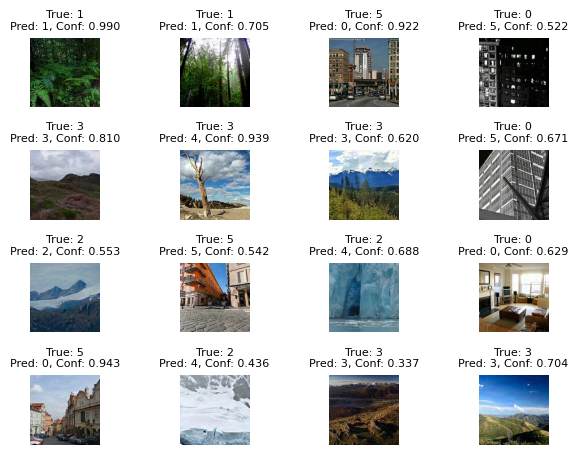

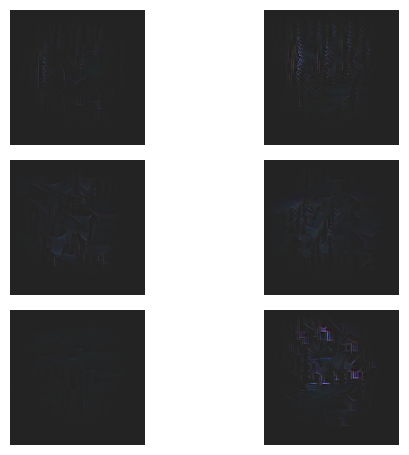

CLASS 0:
	Model Prediction: 5
	Confidence: 0.015043429099023342
CLASS 1:
	Model Prediction: 1
	Confidence: 0.26658910512924194
CLASS 2:
	Model Prediction: 2
	Confidence: 0.21941342949867249
CLASS 3:
	Model Prediction: 2
	Confidence: 0.19353193044662476
CLASS 4:
	Model Prediction: 2
	Confidence: 0.2038041204214096
CLASS 5:
	Model Prediction: 5
	Confidence: 0.9255706667900085


In [6]:
adversarial_example_trainer.plot_adversarial_images(EPSILON, 16, True)
maximal_class_activations(model)